# Introduction to Regression with Neural Networks in tensorflow

- Predicting a numerical variable based on some other combination of variables, or shorter ... predicting a number.

In [1]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


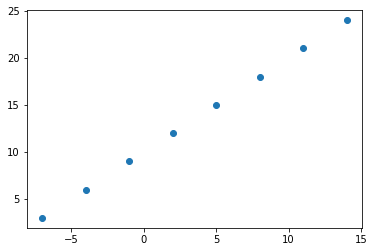

In [2]:
# Creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4., -1, 2., 5., 8., 11., 14.])

# create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(X, y)

In [3]:
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
### turning numpu array to tensor
X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Input and Output shape

In [6]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([696969])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([696969], dtype=int32)>)

### Steps in modelling with tensorflow
1. **Creating the model** - define the input and output as well as the hidden layers of a deep learning model.
2. **Compilling the model** - define the loss function (the function which tells us how wrong model is) and the optimizer (tells model how to improve) and evaluation metrics (what can we use to interpret the performance of the model)
3. **Fitting the model** - letting the model try to find patterns between X & y (features and labels) 

In [7]:
# Optionally, the first layer can receive an `input_shape` argument:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))

###
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
model.add(tf.keras.layers.Dense(4))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

In [8]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics=["mae"]
)

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 531ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [9]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
# Try and make prediction using model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [11]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

Altering the steps we took to create a model.

1. **Creating a model** - might add more layers, increase the number of hidden unit of each layers, change the activate function, etc.
2. **Compilling a model** - might change the optimization function, learning rate, etc.
3. **Fitting a model** - might change **e pochs** or **more data**

In [12]:
# Let's rebuild the model

# 1. Re-create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
# 3. Fit the model (this time we'll train longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 197ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 3

In [13]:
y_pred = model.predict([17.])
y_pred

array([[29.739855]], dtype=float32)

In [17]:
# Let's rebuild the model

# 1. Re-create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
# 3. Fit the model (this time we'll train longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 218ms/step - loss: 12.7339 - mae: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.2088 - mae: 12.2088
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.6861 - mae: 11.6861
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 11.1615 - mae: 11.1615
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6118 - mae: 10.6118
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.0388 - mae: 10.0388
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 9.4399 - mae: 9.4399
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 8.8100 - mae: 8.8100
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 8.1464 - mae: 8.1464
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 7.4413 - mae: 7.4413
Epoch 11/100
1/1 [==============================] - 0s 6ms/step

In [18]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [19]:
model.predict([17.]) # it's seem like previous model did better
# -> overfitting because the loss is decreasing but the prediction on actual is decreasing in accuracy

array([[31.856882]], dtype=float32)

In [20]:
# Let's rebuild the model

# 1. Re-create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=["mae"]
)
# 3. Fit the model (this time we'll train longer)
model.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 279ms/step - loss: 12.5419 - mae: 12.5419
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.8482 - mae: 11.8482
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 11.1529 - mae: 11.1529
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4547 - mae: 10.4547
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 9.7511 - mae: 9.7511
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 9.0391 - mae: 9.0391
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 8.3156 - mae: 8.3156
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 7.5775 - mae: 7.5775
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9147 - mae: 6.9147
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9004 - mae: 6.9004
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - los

In [21]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [22]:
model.predict([17.])

array([[26.868332]], dtype=float32)

## Evaluate the model
In practice, a typical workflow to go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation...
> "Visualize, visualize, visualize"
It's a good idead to visualize:
* The data - What data are working with look like?
* The model itselft - What does our model look like?
* The training of model - How does a model perform while it learns?
* The predictions of the model - How do the predictions model line up against the ground truth

In [23]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
# Make label for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [25]:
# Visualize the data
import matplotlib.pyplot as plt

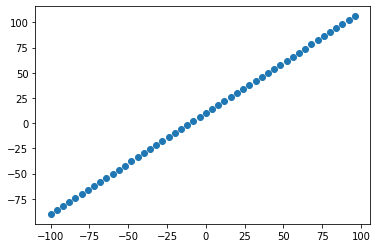

In [26]:
plt.scatter(X, y)

### The 3 sets...
* **Training** set - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation** set - the model gets turn on this data, which is typically 10-15%.
* **Test** set - the model gets evaluated on this data to test what is has learned, which is typically 10-15%.


In [27]:
len(X)

50

In [28]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualing the data

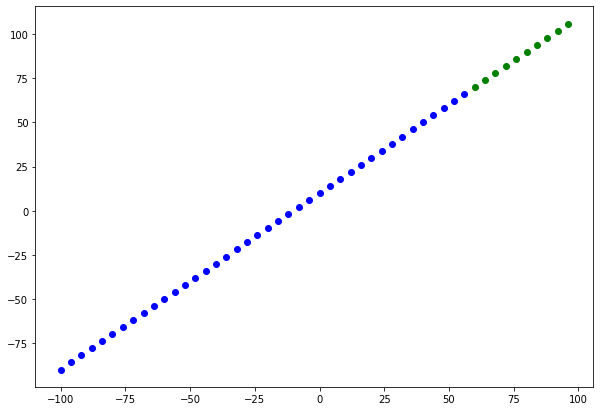

In [29]:
plt.figure(figsize=(10,7))
# plot the training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
#plot the test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

plt.show()

In [ ]:
# build the model

# 1. Create model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [ ]:
# model.summary()

In [ ]:
# model.build()

In [30]:
# Let's create a model which builds automatically by defining the input_shape in the first layer
tf.random.set_seed(42)

# 1. Create model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# summary the model
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't update during training (this is tipical when you bring in alread learn patterns or parameters from other models during **transfer learning**)

In [31]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [32]:
from tensorflow.keras.utils import plot_model

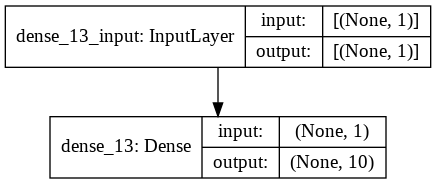

In [33]:
plot_model(model,show_shapes=True)

In [34]:
# 1. Create model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="Model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# summary the model
model.summary()

Model: "Model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


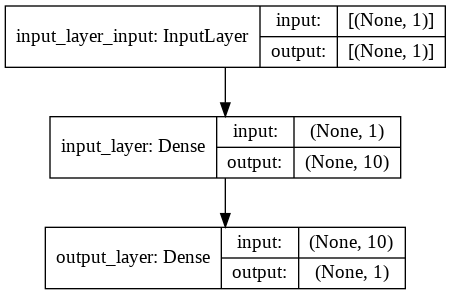

In [36]:
plot_model(model, show_shapes=True)

In [37]:
model.fit(X_train, y_train,epochs=100,verbose=False)

### Visualizing our model's predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred (ground truth versus your model's predictions). 

In [38]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.48064 ],
       [ 75.06516 ],
       [ 79.64968 ],
       [ 84.234215],
       [ 88.81873 ],
       [ 93.40325 ],
       [ 97.98778 ],
       [102.5723  ],
       [107.15683 ],
       [111.741356]], dtype=float32)

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [40]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=y_pred):
  """
  Plot training data,test data and compares the predictions to ground truth 
  """
  plt.figure(figsize=(10,7))
  # plot data training in blue
  plt.scatter(train_data, train_label, c="b", label="Training")
  # plot data testing in green
  plt.scatter(test_data, test_label, c="g", label="Testing")
  # plt predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  plt.legend()

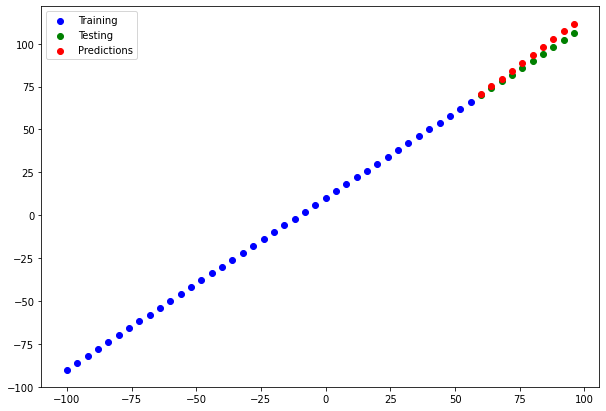

In [41]:
plot_predictions()

### Evaluating our model's predcitions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performace.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of model's preditions"
* MSE - mean square error, "squares the average errors"

In [42]:
# Evaluate the model
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 100ms/step - loss: 3.1110 - mae: 3.1110


[3.1109938621520996, 3.1109938621520996]

In [43]:
# Calculate the mean absolute error
tf.keras.losses.mean_absolute_error(
    y_true=y_test,
    y_pred=tf.squeeze(y_pred)
)

<tf.Tensor: shape=(), dtype=float32, numpy=3.1109948>

In [ ]:
y_test, tf.constant(y_pred) # cause the shape of y_pred is (10,1)  not the same as y_test(10) so we squeeze the y_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 70.48064 ],
        [ 75.06516 ],
        [ 79.64968 ],
        [ 84.234215],
        [ 88.81873 ],
        [ 93.40325 ],
        [ 97.98778 ],
        [102.5723  ],
        [107.15683 ],
        [111.741356]], dtype=float32)>)

In [ ]:
tf.constant(y_test)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [44]:
# Calculate the mean square error
mse = tf.metrics.MSE(y_true=y_test,
                     y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=12.497052>

In [45]:
# make functions to resue MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.MAE(y_true=y_true,y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.metrics.MSE(y_true=y_true,y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layers.
3. Train for longer - give your model more chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer for 100 epochs.
2. `model_2` - 2 layers, train for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [46]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - l

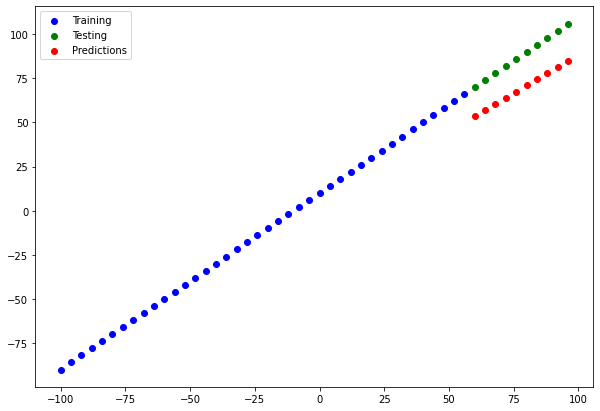

In [47]:
# make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [48]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2`**

2 layers, train for 100 epochs.

In [49]:
# build model 2
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# 2. Compilling the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
# 3. Fitting the model
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [==========================

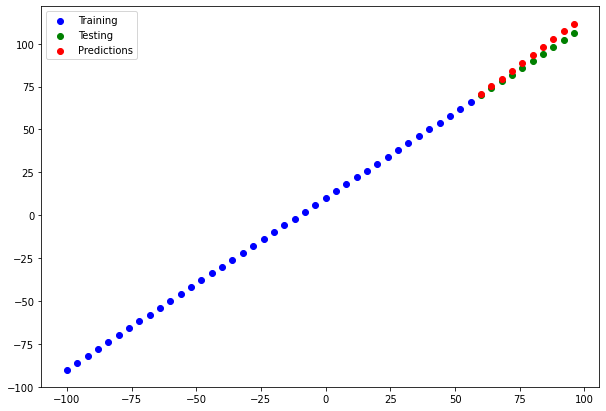

In [50]:
y_preds_2 = model.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [51]:
# Calculate model_2 valuation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1109948>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.497052>)

**Build `model_3`**

2 layers, trained for 500 epochs

In [52]:
# Build the model
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                             
])
# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
# 3. Fit the model
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/500
2/2 [==========================

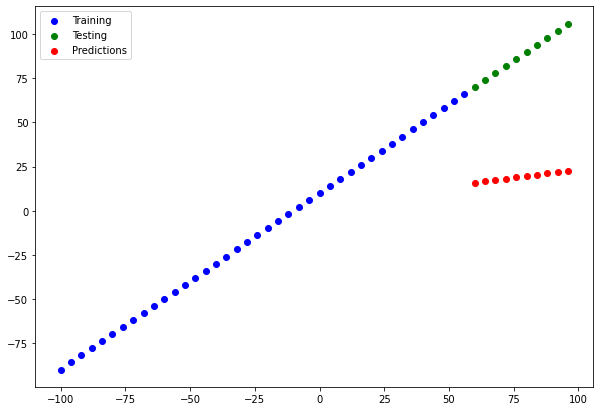

In [53]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [54]:
# calculate model 3 evaluate metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

**Note** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments

We've run a few experiments, Let's compare the result

In [55]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3",mae_3.numpy(),mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])

In [56]:
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.110995,12.497052
2,model_3,68.713615,4808.027344


Looks like `model_2` perfomed the best..

In [57]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


>🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "Experiment, epxeriment, experiment". 

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource** as you build more model, you'll want to look into using:

* [TensorBoard](https://www.tensorflow.org/tensorboard) - a component of the TensorFlow library to help track modelling experiments.
* [Weigths and Biases](https://wandb.ai/site) - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).


## Saving models

There are twon main formats we can save our model
1. The SavedModel format.
2. The HDF5 format.

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel")

INFO:tensorflow:Assets written to: best_model_SavedModel/assets


In [ ]:
# Save model using the HDF5 format 
model_2.save("best_model_HDF5.h5")

## Loading in a saved model

In [ ]:
# loading in the SavedModel format model
loaded_SavedModel_model = tf.keras.models.load_model("/content/best_model_SavedModel")
loaded_SavedModel_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model 2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_model_preds = model_2.predict(X_test)

model_2_preds == loaded_SavedModel_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# loading in the model HDF5 format model
loaded_HDF5_model = tf.keras.models.load_model("/content/best_model_HDF5.h5")
loaded_HDF5_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model 2 predictions with HDF5 format model predictions
model_2_preds = model_2.predict(X_test)
loaded_HDF5_model_preds = model_2.predict(X_test)

model_2_preds == loaded_HDF5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### A larger example

In [58]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
# read in the insurance dataset 
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [60]:
insurance_one_hot = insurance.copy()
# insurance.sex = tf.one_hot(insurance.sex, depth=2)
# insurance.sex

In [61]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [62]:
# Create X & y values
# X = insurance_one_hot.loc[:, insurance_one_hot.columns!="charges"]
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot.charges
X, y

(      age     bmi  ...  region_southeast  region_southwest
 0      19  27.900  ...                 0                 1
 1      18  33.770  ...                 1                 0
 2      28  33.000  ...                 1                 0
 3      33  22.705  ...                 0                 0
 4      32  28.880  ...                 0                 0
 ...   ...     ...  ...               ...               ...
 1333   50  30.970  ...                 0                 0
 1334   18  31.920  ...                 0                 0
 1335   18  36.850  ...                 1                 0
 1336   21  25.800  ...                 0                 1
 1337   61  29.070  ...                 0                 0
 
 [1338 rows x 11 columns], 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Lengt

In [ ]:
# Create training & test sets using numpy

# X_train, X_test = np.split(X.sample(frac=1, random_state=42), [int(.8*len(X))])
# y_train, y_test = np.split(y.sample(frac=1, random_state=42), [int(.8*len(y))])
# X_train, X_test, y_train, y_test

In [63]:
# Create training & test sets using skilearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test), len(y_train), len(y_test)

(1338, 1070, 268, 1070, 268)

In [64]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Build a model
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mse"])
# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 802us/step - loss: 8637.1006 - mse: 189400400.0000
Epoch 2/100
34/34 [==============================] - 0s 751us/step - loss: 7886.7759 - mse: 168607248.0000
Epoch 3/100
34/34 [==============================] - 0s 734us/step - loss: 7558.1470 - mse: 163018784.0000
Epoch 4/100
34/34 [==============================] - 0s 967us/step - loss: 7792.0220 - mse: 175326416.0000
Epoch 5/100
34/34 [==============================] - 0s 799us/step - loss: 7748.3887 - mse: 166707568.0000
Epoch 6/100
34/34 [==============================] - 0s 952us/step - loss: 7595.3940 - mse: 163492480.0000
Epoch 7/100
34/34 [==============================] - 0s 783us/step - loss: 7589.9844 - mse: 166560752.0000
Epoch 8/100
34/34 [==============================] - 0s 818us/step - loss: 7698.5576 - mse: 162328496.0000
Epoch 9/100
34/34 [==============================] - 0s 817us/step - loss: 7496.7778 - mse: 162001408.0000
Epoch 10/100
34/34 [=================

In [66]:
# Check the results of the insurance model of the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7023.3291 - mse: 111577856.0000


[7023.3291015625, 111577856.0]

Right now look like our model isn't performing too well... let's try and imrove it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden unit, and change optimizer to Adam because SGD() is exploding gradient.
2. Same as above but Train for longer. (200 epochs)
3. ...


In [67]:
# Experiment 1: add extra layer with more hidden units
tf.random.set_seed(42)

# 1. Create a model
insurance_model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
insurance_model_1.compile(loss=tf.keras.losses.mae,
                        # optimizer=tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True, clipvalue=0.5),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mse"])
# 3. Fit the model
insurance_model_1.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 940us/step - loss: 13273.1602 - mse: 320363040.0000
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13104.4297 - mse: 315575840.0000
Epoch 3/100
34/34 [==============================] - 0s 984us/step - loss: 12749.5420 - mse: 305783328.0000
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12055.7510 - mse: 287498240.0000
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10905.8154 - mse: 259018208.0000
Epoch 6/100
34/34 [==============================] - 0s 945us/step - loss: 9457.7227 - mse: 222531584.0000
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8147.6543 - mse: 186939216.0000
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7528.8408 - mse: 162904960.0000
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7429.1528 - mse: 155102256.0000
Epoch 10/100
34/34 [========================

In [68]:
insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4924.5093 - mse: 100301520.0000


[4924.50927734375, 100301520.0]

In [69]:
# Experiment 2, same as experiment 1 but train longer.

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mse"])
# 3. Fit the model
history = insurance_model_2.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13269.0664 - mse: 320248096.0000
Epoch 2/200
34/34 [==============================] - 0s 927us/step - loss: 13074.6016 - mse: 314739072.0000
Epoch 3/200
34/34 [==============================] - 0s 948us/step - loss: 12661.2969 - mse: 303394144.0000
Epoch 4/200
34/34 [==============================] - 0s 951us/step - loss: 11872.5186 - mse: 282815552.0000
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 10626.1904 - mse: 252115264.0000
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9157.6797 - mse: 214778752.0000
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 7946.7690 - mse: 180640224.0000
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7485.6001 - mse: 160162768.0000
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7421.2012 - mse: 154810464.0000
Epoch 10/200
34/34 [========================

In [70]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3479.7761 - mse: 41663872.0000


[3479.776123046875, 41663872.0]

Text(0.5, 0, 'epochs')

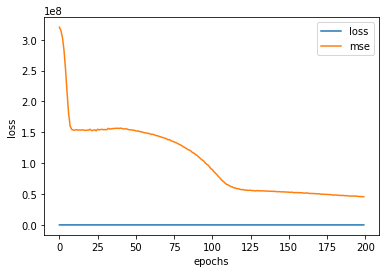

In [72]:
# plot history (also known  as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X_train.shape

(1070, 11)

In [73]:
# Experiment 3, architect adapted from books.

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
  tf.keras.Input(shape=(11,)),
  tf.keras.layers.Dense(100,activation="relu", name="hidden_layer_1"),
  tf.keras.layers.Dense(100, activation="relu", name="hidden_layer_2"),
  tf.keras.layers.Dense(100, activation="relu", name="hidden_layer_3"),
  tf.keras.layers.Dense(1, name="output_layer")
])
# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          # optimizer=tf.keras.optimizers.SGD(lr=0.001),
                          optimizer=tf.keras.optimizers.Adam(lr=0.001),
                          metrics=["mse"])
# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


34/34 [==============================] - 0s 2ms/step - loss: 13276.7744 - mse: 320456832.0000
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12485.2939 - mse: 298600160.0000
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 8946.6797 - mse: 203796592.0000
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 7441.6738 - mse: 152742160.0000
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 7320.1655 - mse: 151270448.0000
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 7262.1665 - mse: 156878528.0000
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 7185.5117 - mse: 154324208.0000
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7116.0684 - mse: 155353952.0000
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7045.6235 - mse: 155646848.0000
Epoch 10/200
34/34 [==============================] - 0s 1ms/step

In [74]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 2031.4650 - mse: 23774484.0000


[2031.4649658203125, 23774484.0]

In [75]:
insurance_model_3.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 100)               1200      
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 100)               10100     
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 100)               10100     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 101       
Total params: 21,501
Trainable params: 21,501
Non-trainable params: 0
_________________________________________________________________


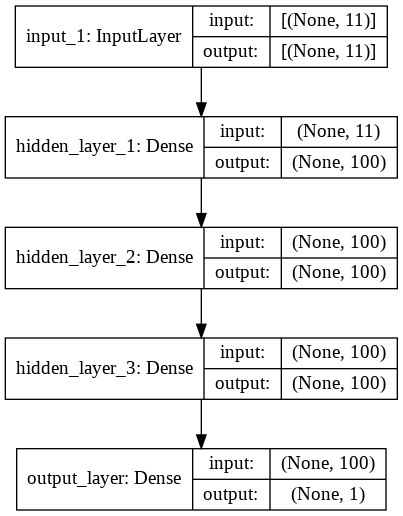

In [76]:
plot_model(insurance_model_3, show_shapes=True)

> **Question** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... So tensorflow has a solution! It's called the [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a Tensorflow component you can add to your model to stop training one it stops to improving a certain metric.

### Preprocessing data (normalization and standardization)

In terms of scaling values, neural network tend to refer normalization. 

If you not sure what to use, you could try both and see which perfoms better.

[read more](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

In [77]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


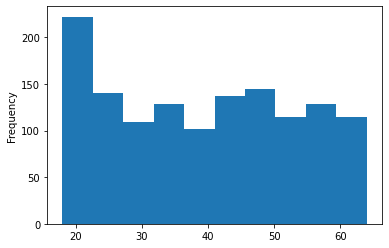

In [78]:
X["age"].plot(kind="hist")

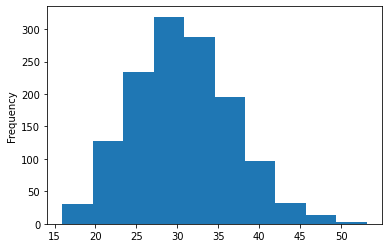

In [79]:
X["bmi"].plot(kind="hist")

In [80]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# read in the insurance dataframe 
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes form Scikit-learn

In [81]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)
# Create X & y 
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test) 


In [82]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [83]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [84]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

 Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes

In [85]:
# Build neural network model to fit on our normalized data

# this model is the same as insurance_model 1
tf.random.set_seed(42)

# 1. Create a model
insurance_model_normalized = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
insurance_model_normalized.compile(loss=tf.keras.losses.mae,
                        # optimizer=tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True, clipvalue=0.5),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mse"])
# 3. Fit the model
insurance_model_normalized.fit(X_train_normal, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13342.6475 - mse: 322361504.0000
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13333.4785 - mse: 322112512.0000
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13312.0234 - mse: 321531136.0000
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13267.7930 - mse: 320334816.0000
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13189.5850 - mse: 318247392.0000
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13066.4502 - mse: 314949248.0000
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12888.1953 - mse: 310245216.0000
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 12644.6523 - mse: 303937664.0000
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 12325.5469 - mse: 295792992.0000
Epoch 10/100
34/34 [==========================

In [86]:
# evaluate the model 
insurance_model_normalized.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3438.7844 - mse: 41750900.0000


[3438.784423828125, 41750900.0]

In [ ]:
# insurance_model_1.evaluate(X_test, y_test)
# 9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mse: 100286856.0000

In [87]:
## custom model, smaller the insurance_model_normalized but 
tf.random.set_seed(42)

# 1. Create a model
model_normalized = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
model_normalized.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mse"])
# 3. Fit the model
model_normalized.fit(X_train_normal, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 796us/step - loss: 13344.3066 - mse: 322411808.0000
Epoch 2/100
34/34 [==============================] - 0s 810us/step - loss: 13339.4785 - mse: 322289696.0000
Epoch 3/100
34/34 [==============================] - 0s 858us/step - loss: 13325.8730 - mse: 321946560.0000
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13284.3896 - mse: 320889344.0000
Epoch 5/100
34/34 [==============================] - 0s 801us/step - loss: 13156.0547 - mse: 317689184.0000
Epoch 6/100
34/34 [==============================] - 0s 763us/step - loss: 12756.2744 - mse: 307793472.0000
Epoch 7/100
34/34 [==============================] - 0s 832us/step - loss: 11604.6348 - mse: 280422240.0000
Epoch 8/100
34/34 [==============================] - 0s 870us/step - loss: 9815.3809 - mse: 233172928.0000
Epoch 9/100
34/34 [==============================] - 0s 854us/step - loss: 8611.2627 - mse: 192571744.0000
Epoch 10/100
34/34 [============

In [88]:
# the model smaller than insurance_model_normalized but perfoms better :v
model_normalized.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3170.0486 - mse: 43315940.0000


[3170.048583984375, 43315940.0]

### Calculate number of parameters 

<a href="https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d"> read more</a>

In [97]:
tf.random.set_seed(42)

demo_ = tf.keras.Sequential([
  tf.keras.layers.Dense(4, input_shape=[1]),
  tf.keras.layers.Dense(2),
  tf.keras.layers.Dense(1)
], name="Model_demo")

demo_.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"]
)

demo_.summary()

Model: "Model_demo"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 4)                 8         
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 3         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


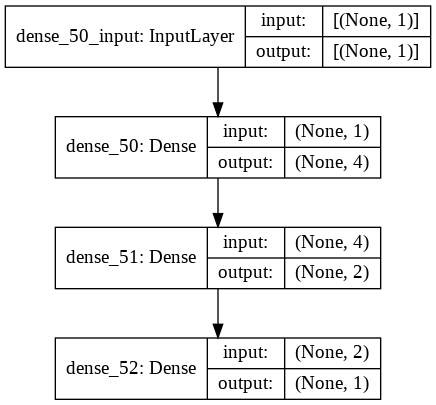

In [98]:
plot_model(demo_, show_shapes=True)